In [82]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
mpl.rcParams['figure.dpi'] = 100
import matplotlib.pyplot as plt
import rasterio
from matplotlib.colors import Normalize
from matplotlib.cm import viridis
import seaborn as sns

Slope of NDVI/year: -0.0037


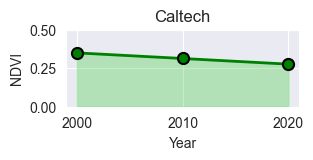

In [83]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import geopandas as gpd
from rasterstats import zonal_stats
import numpy as np

# Base paths
base_tiff_path = '/Users/braydennoh/Downloads/drive-download-20240514T154154Z-001/NDVI_L7_August_{}.tif'
shapefile_path = '/Users/braydennoh/Downloads/pasadenandvi/Zoning_-4568161463289048110/Zoning.shp'

# Years of interest
years = [2000, 2010, 2020]

# Load the shapefile using Geopandas
zones = gpd.read_file(shapefile_path)

# Ensure the shapefile CRS is updated later based on the raster
caltechdistrict = []

for year in years:
    # Update the path to the NDVI TIFF file for each year
    tiff_path = base_tiff_path.format(year)

    # Open the NDVI raster file
    with rasterio.open(tiff_path) as src:
        ndvi = src.read(1, masked=True)
        affine = src.transform

        if zones.crs != src.crs:
            zones = zones.to_crs(src.crs)  # Ensure CRS matches

        # Calculate zonal statistics
        zonal_stats_results = zonal_stats(zones, ndvi, affine=affine, stats="mean")
        zones['mean_ndvi'] = [stat['mean'] for stat in zonal_stats_results]

        # Extract the mean NDVI value for the PS zone at index 40-41
        highlight_zone = zones[zones['CODE_LABEL'] == 'PS'].iloc[40:41]
        caltechdistrict.append(highlight_zone['mean_ndvi'].values[0])
        
        
years = np.array([2000, 2010, 2020])

# Simulated mean NDVI values for each year from your dataset
# Assuming caltechdistrict has been populated correctly from your previous code snippet
caltechdistrict = np.array(caltechdistrict)

# Calculate the coefficients of a linear fit (slope and intercept)
slope, intercept = np.polyfit(years, caltechdistrict, 1)
print("Slope of NDVI/year: {:.4f}".format(slope))


# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Create a stylish plot using seaborn
plt.figure(figsize=(3, 1))  # Adjusted the size for better visibility
ax = sns.lineplot(x=years, y=caltechdistrict, marker='o', color='green', label='NDVI',
                  markeredgewidth=1.5, lw=2,markeredgecolor='black', markersize=8)

ax.fill_between(years, 0, caltechdistrict, color='limegreen', alpha=0.3)
plt.xticks([2000, 2010, 2020])

# Remove the plot legend
ax.legend_.remove()

# Additional styling
plt.title('Caltech')
plt.xlabel('Year')
plt.ylabel('NDVI')
plt.ylim([0, 0.5])
plt.show()

Slope of NDVI/year: -0.0016


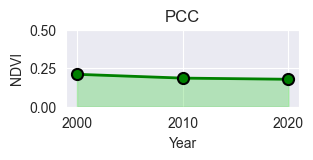

In [84]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import geopandas as gpd
from rasterstats import zonal_stats
import numpy as np

# Base paths
base_tiff_path = '/Users/braydennoh/Downloads/drive-download-20240514T154154Z-001/NDVI_L7_August_{}.tif'
shapefile_path = '/Users/braydennoh/Downloads/pasadenandvi/Zoning_-4568161463289048110/Zoning.shp'

# Years of interest
years = [2000, 2010, 2020]

# Load the shapefile using Geopandas
zones = gpd.read_file(shapefile_path)

# Ensure the shapefile CRS is updated later based on the raster
pccdistrict = []

for year in years:
    # Update the path to the NDVI TIFF file for each year
    tiff_path = base_tiff_path.format(year)

    # Open the NDVI raster file
    with rasterio.open(tiff_path) as src:
        ndvi = src.read(1, masked=True)
        affine = src.transform

        if zones.crs != src.crs:
            zones = zones.to_crs(src.crs)  # Ensure CRS matches

        # Calculate zonal statistics
        zonal_stats_results = zonal_stats(zones, ndvi, affine=affine, stats="mean")
        zones['mean_ndvi'] = [stat['mean'] for stat in zonal_stats_results]

        # Extract the mean NDVI value for the PS zone at index 40-41
        highlight_zone = zones[zones['CODE_LABEL'] == 'PS'].iloc[11:12]
        pccdistrict.append(highlight_zone['mean_ndvi'].values[0])

years = np.array([2000, 2010, 2020])

# Simulated mean NDVI values for each year from your dataset
# Assuming caltechdistrict has been populated correctly from your previous code snippet
pccdistrict = np.array(pccdistrict)

# Calculate the coefficients of a linear fit (slope and intercept)
slope, intercept = np.polyfit(years, pccdistrict, 1)
print("Slope of NDVI/year: {:.4f}".format(slope))


# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Create a stylish plot using seaborn
plt.figure(figsize=(3, 1))  # Adjusted the size for better visibility
ax = sns.lineplot(x=years, y=pccdistrict, marker='o', color='green', label='NDVI',
                  markeredgewidth=1.5, lw=2,markeredgecolor='black', markersize=8)

ax.fill_between(years, 0, pccdistrict, color='limegreen', alpha=0.3)
plt.xticks([2000, 2010, 2020])

# Remove the plot legend
ax.legend_.remove()

# Additional styling
plt.title('PCC')
plt.xlabel('Year')
plt.ylabel('NDVI')
plt.ylim([0, 0.5])
plt.show()

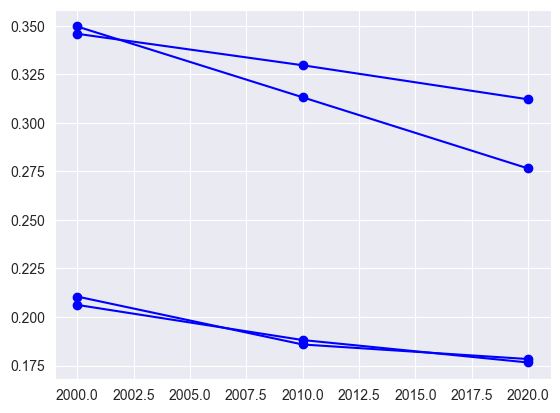

In [85]:
plt.plot(years, caltechdistrict, marker='o', linestyle='-', color='b')
plt.plot(years, pccdistrict, marker='o', linestyle='-', color='b')
plt.plot(years, residentdistrict, marker='o', linestyle='-', color='b')
plt.plot(years, industrydistrict, marker='o', linestyle='-', color='b')


Slope of NDVI/year: -0.0017


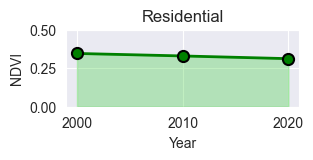

In [86]:
import matplotlib.pyplot as plt
import rasterio
import geopandas as gpd
from rasterstats import zonal_stats
import numpy as np

# Base paths
base_tiff_path = '/Users/braydennoh/Downloads/drive-download-20240514T154154Z-001/NDVI_L7_August_{}.tif'
shapefile_path = '/Users/braydennoh/Downloads/pasadenandvi/Zoning_-4568161463289048110/Zoning.shp'

# Years of interest
years = [2000, 2010, 2020]

# Load the shapefile using Geopandas
zones = gpd.read_file(shapefile_path)

# Define the specific zone codes to average
target_codes = ['RS-1', 'RS-2', 'RS-3', 'RS-4', 'RS-5', 'RS-6', 'RM-12', 'RM-16', 'RM-32', 'RM-48']

# Store averaged NDVI values for each year
residentdistrict = []

for year in years:
    # Update the path to the NDVI TIFF file for each year
    tiff_path = base_tiff_path.format(year)

    # Open the NDVI raster file
    with rasterio.open(tiff_path) as src:
        ndvi = src.read(1, masked=True)
        affine = src.transform

        if zones.crs != src.crs:
            zones = zones.to_crs(src.crs)  # Ensure CRS matches

        # Calculate zonal statistics
        zonal_stats_results = zonal_stats(zones, ndvi, affine=affine, stats="mean")
        zones['mean_ndvi'] = [stat['mean'] for stat in zonal_stats_results]

        # Filter the zones to include only the target codes
        filtered_zones = zones[zones['CODE_LABEL'].isin(target_codes)]

        # Calculate the average NDVI for the filtered zones
        average_ndvi = filtered_zones['mean_ndvi'].mean()
        residentdistrict.append(average_ndvi)

years = np.array([2000, 2010, 2020])

# Simulated mean NDVI values for each year from your dataset
# Assuming caltechdistrict has been populated correctly from your previous code snippet
residentdistrict = np.array(residentdistrict)

# Calculate the coefficients of a linear fit (slope and intercept)
slope, intercept = np.polyfit(years, residentdistrict, 1)
print("Slope of NDVI/year: {:.4f}".format(slope))


# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Create a stylish plot using seaborn
plt.figure(figsize=(3, 1))  # Adjusted the size for better visibility
ax = sns.lineplot(x=years, y=residentdistrict, marker='o', color='green', label='NDVI',
                  markeredgewidth=1.5, lw=2,markeredgecolor='black', markersize=8)

ax.fill_between(years, 0, residentdistrict, color='limegreen', alpha=0.3)
plt.xticks([2000, 2010, 2020])

# Remove the plot legend
ax.legend_.remove()

# Additional styling
plt.title('Residential')
plt.xlabel('Year')
plt.ylabel('NDVI')
plt.ylim([0, 0.5])
plt.show()

Slope of NDVI/year: -0.0015


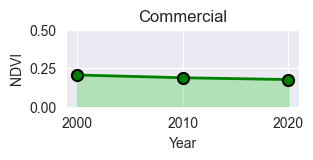

In [87]:
import matplotlib.pyplot as plt
import rasterio
import geopandas as gpd
from rasterstats import zonal_stats
import numpy as np

# Base paths
base_tiff_path = '/Users/braydennoh/Downloads/drive-download-20240514T154154Z-001/NDVI_L7_August_{}.tif'
shapefile_path = '/Users/braydennoh/Downloads/pasadenandvi/Zoning_-4568161463289048110/Zoning.shp'

# Years of interest
years = [2000, 2010, 2020]

# Load the shapefile using Geopandas
zones = gpd.read_file(shapefile_path)

# Define the specific zone codes to average
target_codes = ['CO', 'CL', 'CG', 'IG']

# Store averaged NDVI values for each year
industrydistrict = []

for year in years:
    # Update the path to the NDVI TIFF file for each year
    tiff_path = base_tiff_path.format(year)

    # Open the NDVI raster file
    with rasterio.open(tiff_path) as src:
        ndvi = src.read(1, masked=True)
        affine = src.transform

        if zones.crs != src.crs:
            zones = zones.to_crs(src.crs)  # Ensure CRS matches

        # Calculate zonal statistics
        zonal_stats_results = zonal_stats(zones, ndvi, affine=affine, stats="mean")
        zones['mean_ndvi'] = [stat['mean'] for stat in zonal_stats_results]

        # Filter the zones to include only the target codes
        filtered_zones = zones[zones['CODE_LABEL'].isin(target_codes)]

        # Calculate the average NDVI for the filtered zones
        average_ndvi = filtered_zones['mean_ndvi'].mean()
        industrydistrict.append(average_ndvi)

years = np.array([2000, 2010, 2020])

# Simulated mean NDVI values for each year from your dataset
# Assuming caltechdistrict has been populated correctly from your previous code snippet
industrydistrict = np.array(industrydistrict)

# Calculate the coefficients of a linear fit (slope and intercept)
slope, intercept = np.polyfit(years, industrydistrict, 1)
print("Slope of NDVI/year: {:.4f}".format(slope))


sns.set_style("darkgrid")

# Create a stylish plot using seaborn
plt.figure(figsize=(3, 1))  # Adjusted the size for better visibility
ax = sns.lineplot(x=years, y=industrydistrict, marker='o', color='green', label='NDVI',
                  markeredgewidth=1.5, lw=2,markeredgecolor='black', markersize=8)

ax.fill_between(years, 0, industrydistrict, color='limegreen', alpha=0.3)
plt.xticks([2000, 2010, 2020])

# Remove the plot legend
ax.legend_.remove()

# Additional styling
plt.title('Commercial')
plt.xlabel('Year')
plt.ylabel('NDVI')
plt.ylim([0, 0.5])
plt.show()

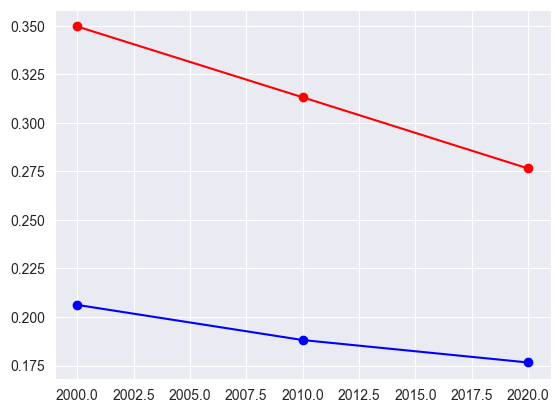

In [88]:
plt.plot(years, ndvi_values, marker='o', linestyle='-', color='r')
plt.plot(years, averaged_ndvi_values, marker='o', linestyle='-', color='b')
